## Import Libraries

In [1]:
#Import Libraries
import numpy as np
from random import sample
import pandas as pd
import matplotlib.pyplot as plt
from collections import deque
import math

## Import the Reward and Transition Matrix from the xls file

In [2]:
#Import the reward table and the transition matrix
r_table = pd.read_excel('environment_matrices.xlsx', sheet_name ='rewards', index_col=0)
state_value_function = pd.read_excel('environment_matrices.xlsx', sheet_name ='State value function')
transition_matrix = pd.read_excel('environment_matrices.xlsx', sheet_name ='transition',index_col=0)
transition_matrix = pd.read_excel('environment_matrices.xlsx', sheet_name ='transition',index_col=0)

## Initialize important parameters and Q matrix

In [3]:
#Initialize parameters
total_episodes = 10000 #Total episodes
number_of_steps = 100 #Maximum steps per episode
epsilon = 1 #Highest exploration probability
epsilon_min = 0.1 # Lowest exploration probability 
decay_rate = 0.996 #Exponential decay rate for exploration probability

#Q Learning parameters
alpha = 0.15 #Learning rate
gamma = 0.999 #Discount rate

#Initialization of the Q matrix
q_table = pd.DataFrame(np.matrix(np.zeros([16,4])).astype("float32"), columns = transition_matrix.columns, index = transition_matrix.index)
q_table.head()

,UP,DOWN,RIGHT,LEFT
A,0.0,0.0,0.0,0.0
B,0.0,0.0,0.0,0.0
C,0.0,0.0,0.0,0.0
D,0.0,0.0,0.0,0.0
E,0.0,0.0,0.0,0.0


In [4]:
# Define the optimal state value table
optimal_state_value_function = np.array(state_value_function)
optimal_state_value_function

array([[-6, -5, -4, -5],
       [-5,  0, -3,  0],
       [-4, -3, -2,  0],
       [ 0, -2, -1,  0]])

## Epsilon-Greedy-Decay Policy

In [5]:
# ε-greedy_decay policy function

def e_greedy_decay_policy(state, epsilon):
    exploration_threshold = np.random.uniform(0,1)
    actions_list = ["UP", "DOWN", "RIGHT", "LEFT"]
    #With probability 1-ε choose the action with the highest q-value
    #e-decay policy implementation
    if (exploration_threshold >= epsilon):
        # Exploit: Then we choose the best action from the Q table
        action = q_table.loc[state, :].argmax()
        #print('Max Q row value', action)  
    else:
        # Explore: We take a random action from the action list
        action = sample(actions_list, 1)[0]
    return action


## 'execute_action' Function

In [6]:
# Execution of the action selected from policy.
def execute_action(state, action):
    next_state = transition_matrix.loc[state,action] #return the next state
    reward = r_table.loc[state, next_state]
    end_episode_states = ['F', 'H', 'L', 'M', 'P']
    done = False #done is a flag to determine if my algorithm is going to terminate or not
    if (next_state in end_episode_states):
        done = True
    print('Current state', state)
    print('Next state', next_state)
    print ('Done', done)
    
    
    return next_state, reward, done

## 'update_Q' Function

In [7]:
#Update Q

def update_Q(current_state, next_state, action, reward, alpha, gamma):
    q_old = q_table.loc[current_state, action] #OLD Q value
    q_new = q_old + alpha * (reward + gamma * max(q_table.loc[next_state,:] - q_old))
    #q_new_values.append(q_new) # # add the new q value to a list with all the q new values
    q_table.loc[current_state, action] = q_new
    
    print('Old Q value:       ', q_old)
    print('Updated Q value (Q new): ', q_new)

## Train the agent

In [8]:
#Training the agent
sum_reward = 0
episodes_rewards_list_per_10 = []


#Main
episodes_rewards_list = []
window = 100
# initialize average rewards
average_reward = deque(maxlen=total_episodes)
# initialize best average reward as negative infinity
best_average_reward = -math.inf
# initialize monitor for most recent rewards
check_rewards = deque(maxlen=window)

#EPISODES
for episode in range(1, total_episodes + 1):
    current_state = 'A'
    episode_reward = 0
    # Decide the value of epsilon before the start of the episode
    for step in range (number_of_steps):
        #Choose action depending on the value of epsilon
        action = e_greedy_decay_policy(current_state, epsilon)
        
        #Execute Action and calculate the next state, the reward and check if the episode is finished
        next_state, reward, done = execute_action(current_state, action)
        
        # Update the Q Matrix based on the new values
        update_Q(current_state, next_state, action, reward, alpha, gamma)
        current_state = next_state
        
        episode_reward += reward 
        
        if done:
            check_rewards.append(episode_reward)
            break

    if episode >= 100:
        average_reward = np.mean(check_rewards)
        if average_reward > best_average_reward:
            best_average_reward = average_reward
    print("\rEpisode {}/{} || Best average reward {}".format(episode, total_episodes, best_average_reward), end="")

    if best_average_reward > 83:
        print('\nThe environment is solved in {} episodes.'.format(episode-1), end = "")
        break
    
    #Reassure that the minimum epsilon value is going to be 0.1 and update the value of epsilon
    epsilon = max(epsilon_min, epsilon*decay_rate)
    episodes_rewards_list.append(episode_reward)
    print("\rEpsilon for this episode is: {}".format(epsilon))
    print("\rThe reward for this episode is: {}".format(episode_reward))
    
    episode_reward = 0


Current state A
Next state B
Done False
Old Q value:        0.0
Updated Q value (Q new):  -0.15
Current state B
Next state F
Done True
Old Q value:        0.0
Updated Q value (Q new):  -15.0
Epsilon for this episode is: 0.996
The reward for this episode is: -101.0
Current state A
Next state B
Done False
Old Q value:        -0.15
Updated Q value (Q new):  -0.27752250506728887
Current state B
Next state B
Done False
Old Q value:        0.0
Updated Q value (Q new):  -0.15
Current state B
Next state F
Done True
Old Q value:        -15.0
Updated Q value (Q new):  -27.75225
Epsilon for this episode is: 0.992016
The reward for this episode is: -102.0
Current state A
Next state A
Done False
Old Q value:        0.0
Updated Q value (Q new):  -0.15
Current state A
Next state B
Done False
Old Q value:        -0.2775225
Updated Q value (Q new):  -0.3859357570558786
Current state B
Next state A
Done False
Old Q value:        0.0
Updated Q value (Q new):  -0.15
Current state A
Next state A
Done False

/Users/kgkolias/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  # Remove the CWD from sys.path while we load stuff.


 A
Next state A
Done False
Old Q value:        -1.650118
Updated Q value (Q new):  -1.6776975589990615
Current state A
Next state A
Done False
Old Q value:        -1.6776975
Updated Q value (Q new):  -1.7011443100094796
Current state A
Next state A
Done False
Old Q value:        -1.7011443
Updated Q value (Q new):  -1.7210776056051253
Current state A
Next state B
Done False
Old Q value:        -1.402726
Updated Q value (Q new):  -1.457958238223195
Current state B
Next state A
Done False
Old Q value:        -0.7703082
Updated Q value (Q new):  -0.9297272602409125
Current state A
Next state A
Done False
Old Q value:        -1.5252917
Updated Q value (Q new):  -1.571576469796896
Current state A
Next state A
Done False
Old Q value:        -1.5715765
Updated Q value (Q new):  -1.610925488102436
Current state A
Next state A
Done False
Old Q value:        -1.6109254
Updated Q value (Q new):  -1.6443780063807965
Current state A
Next state B
Done False
Old Q value:        -1.4579582
Updated Q v

Updated Q value (Q new):  -0.3859357570558786
Current state J
Next state N
Done False
Old Q value:        -0.15
Updated Q value (Q new):  -0.27752250506728887
Current state N
Next state J
Done False
Old Q value:        0.0
Updated Q value (Q new):  -0.15
Current state J
Next state I
Done False
Old Q value:        0.0
Updated Q value (Q new):  -0.19158674727380276
Current state I
Next state E
Done False
Old Q value:        -0.38338545
Updated Q value (Q new):  -0.5868844397321343
Current state E
Next state E
Done False
Old Q value:        -0.7404024
Updated Q value (Q new):  -0.8904024004936218
Current state E
Next state I
Done False
Old Q value:        -0.7566481
Updated Q value (Q new):  -0.8348511492669582
Current state I
Next state E
Done False
Old Q value:        -0.58688444
Updated Q value (Q new):  -0.7740422499984503
Current state E
Next state E
Done False
Old Q value:        -0.8904024
Updated Q value (Q new):  -1.0320780247002839
Current state E
Next state I
Done False
Old Q v

Done False
Old Q value:        -0.15
Updated Q value (Q new):  -0.3000000059604645
Current state J
Next state F
Done True
Old Q value:        -27.75225
Updated Q value (Q new):  -38.59357590827942
Epsilon for this episode is: 0.8216892075061242
The reward for this episode is: -107.0
Current state A
Next state A
Done False
Old Q value:        -2.1300478
Updated Q value (Q new):  -2.243159645795822
Current state A
Next state A
Done False
Old Q value:        -2.424765
Updated Q value (Q new):  -2.493713568472862
Current state A
Next state E
Done False
Old Q value:        -1.8838806
Updated Q value (Q new):  -1.9396625577807427
Current state E
Next state I
Done False
Old Q value:        -1.2551315
Updated Q value (Q new):  -1.3190838744878768
Current state I
Next state J
Done False
Old Q value:        -0.68090653
Updated Q value (Q new):  -0.7513501864731311
Current state J
Next state N
Done False
Old Q value:        -0.38593575
Updated Q value (Q new):  -0.16375544666051867
Current state 

Current state B
Next state C
Done False
Old Q value:        -1.5834516
Updated Q value (Q new):  -1.647392373085022
Current state C
Next state G
Done False
Old Q value:        -1.009149
Updated Q value (Q new):  -1.0218766363084315
Current state G
Next state K
Done False
Old Q value:        -0.09308412
Updated Q value (Q new):  0.06610312052965164
Current state K
Next state O
Done False
Old Q value:        1.9702275
Updated Q value (Q new):  7.308236213111877
Current state O
Next state N
Done False
Old Q value:        0.0
Updated Q value (Q new):  0.7179427481174468
Current state N
Next state J
Done False
Old Q value:        -0.15
Updated Q value (Q new):  -0.2353370934486389
Current state J
Next state I
Done False
Old Q value:        -0.61769086
Updated Q value (Q new):  -0.8006398769557476
Current state I
Next state M
Done True
Old Q value:        -72.78523
Updated Q value (Q new):  -76.87836544723511
Epsilon for this episode is: 0.7706496713559033
The reward for this episode is: -10

Current state A
Next state A
Done False
Old Q value:        -3.2550113
Updated Q value (Q new):  -3.306531886136532
Current state A
Next state A
Done False
Old Q value:        -3.306532
Updated Q value (Q new):  -3.350332112336159
Current state A
Next state E
Done False
Old Q value:        -2.5978246
Updated Q value (Q new):  -2.571197436922789
Current state E
Next state E
Done False
Old Q value:        -2.203444
Updated Q value (Q new):  -2.235914795798063
Current state E
Next state I
Done False
Old Q value:        -1.4191316
Updated Q value (Q new):  -1.3619934249639511
Current state I
Next state J
Done False
Old Q value:        -0.036827877
Updated Q value (Q new):  0.11121560363769531
Current state J
Next state I
Done False
Old Q value:        -0.80063987
Updated Q value (Q new):  -0.8139983272194863
Current state I
Next state M
Done True
Old Q value:        -80.35814
Updated Q value (Q new):  -83.31647190322876
Epsilon for this episode is: 0.7141417568142568
The reward for this ep

Old Q value:        0.1452386
Updated Q value (Q new):  3.6763070672273637
Current state K
Next state O
Done False
Old Q value:        24.71026
Updated Q value (Q new):  30.19419143829346
Current state O
Next state O
Done False
Old Q value:        0.0
Updated Q value (Q new):  9.186763852500915
Current state O
Next state K
Done False
Old Q value:        3.676307
Updated Q value (Q new):  7.500011775588989
Current state K
Next state O
Done False
Old Q value:        30.194191
Updated Q value (Q new):  34.85635531330109
Current state O
Next state O
Done False
Old Q value:        9.186764
Updated Q value (Q new):  16.996891065979003
Current state O
Next state O
Done False
Old Q value:        16.996891
Updated Q value (Q new):  23.636670754623413
Current state O
Next state P
Done True
Old Q value:        62.3074
Updated Q value (Q new):  67.97063589725494
Epsilon for this episode is: 0.6778846925020507
The reward for this episode is: 85.0
Current state A
Next state A
Done False
Old Q value:

Done False
Old Q value:        -2.2697167
Updated Q value (Q new):  -2.129258034610748
Current state A
Next state A
Done False
Old Q value:        -2.7639806
Updated Q value (Q new):  -2.5494564784884455
Current state A
Next state E
Done False
Old Q value:        -0.331387
Updated Q value (Q new):  -0.11827776196002962
Current state E
Next state E
Done False
Old Q value:        -1.2399011
Updated Q value (Q new):  -0.8906509882688523
Current state E
Next state F
Done True
Old Q value:        -99.44728
Updated Q value (Q new):  -99.54510584335327
Epsilon for this episode is: 0.640894530163046
The reward for this episode is: -106.0
Current state A
Next state B
Done False
Old Q value:        -2.6849802
Updated Q value (Q new):  -2.599362663179636
Current state B
Next state C
Done False
Old Q value:        -1.1126245
Updated Q value (Q new):  -0.8311103852272034
Current state C
Next state G
Done False
Old Q value:        1.7670162
Updated Q value (Q new):  2.2638063549518583
Current state 

Current state A
Next state E
Done False
Old Q value:        1.8612679
Updated Q value (Q new):  2.2850782289505003
Current state E
Next state F
Done True
Old Q value:        -99.698975
Updated Q value (Q new):  -99.75908326416015
Epsilon for this episode is: 0.603499120311678
The reward for this episode is: -101.0
Current state A
Next state A
Done False
Old Q value:        -1.7068263
Updated Q value (Q new):  -1.2586394046068192
Current state A
Next state A
Done False
Old Q value:        -1.5222656
Updated Q value (Q new):  -1.101735061097145
Current state A
Next state B
Done False
Old Q value:        -1.5111529
Updated Q value (Q new):  -1.1554219752311705
Current state B
Next state F
Done True
Old Q value:        -98.37099
Updated Q value (Q new):  -98.63009454574585
Epsilon for this episode is: 0.6010851238304312
The reward for this episode is: -103.0
Current state A
Next state E
Done False
Old Q value:        2.2850783
Updated Q value (Q new):  2.6453806267619133
Current state E
Ne

Current state O
Next state P
Done True
Old Q value:        94.713005
Updated Q value (Q new):  95.52026125679016
Epsilon for this episode is: 0.563748493840832
The reward for this episode is: 94.0
Current state A
Next state E
Done False
Old Q value:        19.185938
Updated Q value (Q new):  20.694580980014802
Current state E
Next state E
Done False
Old Q value:        2.7608829
Updated Q value (Q new):  6.730820377349853
Current state E
Next state A
Done False
Old Q value:        2.818692
Updated Q value (Q new):  5.3473939092636105
Current state A
Next state E
Done False
Old Q value:        20.69458
Updated Q value (Q new):  21.977153143501283
Current state E
Next state A
Done False
Old Q value:        5.347394
Updated Q value (Q new):  7.689363636779785
Current state A
Next state E
Done False
Old Q value:        21.977154
Updated Q value (Q new):  23.06753317451477
Current state E
Next state I
Done False
Old Q value:        30.254627
Updated Q value (Q new):  32.81381775302887
Curre

Old Q value:        66.02403
Updated Q value (Q new):  68.11803840065002
Current state J
Next state I
Done False
Old Q value:        16.977087
Updated Q value (Q new):  24.490558837509155
Current state I
Next state J
Done False
Old Q value:        68.11804
Updated Q value (Q new):  69.89826049156189
Current state J
Next state F
Done True
Old Q value:        -83.316475
Updated Q value (Q new):  -85.83150114860534
Epsilon for this episode is: 0.5329864062229905
The reward for this episode is: -115.0
Current state A
Next state A
Done False
Old Q value:        18.951408
Updated Q value (Q new):  21.849890742111207
Current state A
Next state E
Done False
Old Q value:        39.294968
Updated Q value (Q new):  40.576777587509156
Current state E
Next state I
Done False
Old Q value:        48.849922
Updated Q value (Q new):  51.85401590576172
Current state I
Next state J
Done False
Old Q value:        69.89826
Updated Q value (Q new):  71.4117145515442
Current state J
Next state F
Done True
Ol

Done False
Old Q value:        24.955936
Updated Q value (Q new):  32.12525525608063
Current state E
Next state I
Done False
Old Q value:        73.80024
Updated Q value (Q new):  74.84252752685546
Current state I
Next state J
Done False
Old Q value:        81.75678
Updated Q value (Q new):  82.7678788028717
Current state J
Next state K
Done False
Old Q value:        89.50517
Updated Q value (Q new):  90.29909099502564
Current state K
Next state G
Done False
Old Q value:        15.328967
Updated Q value (Q new):  22.198357837295532
Current state G
Next state K
Done False
Old Q value:        62.17175
Updated Q value (Q new):  67.0615809091568
Current state K
Next state O
Done False
Old Q value:        95.80426
Updated Q value (Q new):  96.1626415157318
Current state O
Next state O
Done False
Old Q value:        56.99361
Updated Q value (Q new):  63.16776752719879
Current state O
Next state P
Done True
Old Q value:        99.19686
Updated Q value (Q new):  99.33221160621643
Epsilon for t

Old Q value:        89.25367
Updated Q value (Q new):  89.85410987739563
Current state J
Next state K
Done False
Old Q value:        94.26161
Updated Q value (Q new):  94.62423013954162
Current state K
Next state O
Done False
Old Q value:        97.68249
Updated Q value (Q new):  97.857833203125
Current state O
Next state P
Done True
Old Q value:        99.85363
Updated Q value (Q new):  99.89056360054016
Epsilon for this episode is: 0.4707123832621127
The reward for this episode is: 94.0
Current state A
Next state B
Done False
Old Q value:        5.759843
Updated Q value (Q new):  6.901437100982665
Current state B
Next state F
Done True
Old Q value:        -99.332214
Updated Q value (Q new):  -99.44728203430176
Epsilon for this episode is: 0.4688295337290642
The reward for this episode is: -101.0
Current state A
Next state B
Done False
Old Q value:        6.9014373
Updated Q value (Q new):  7.87196358859539
Current state B
Next state C
Done False
Old Q value:        14.37909
Updated Q

Current state E
Next state I
Done False
Old Q value:        91.194214
Updated Q value (Q new):  91.49570170097351
Current state I
Next state J
Done False
Old Q value:        94.207146
Updated Q value (Q new):  94.42470417137146
Current state J
Next state I
Done False
Old Q value:        57.811806
Updated Q value (Q new):  63.14824875717163
Current state I
Next state J
Done False
Old Q value:        94.424706
Updated Q value (Q new):  94.60966264762878
Current state J
Next state K
Done False
Old Q value:        96.65999
Updated Q value (Q new):  96.81185374679565
Current state K
Next state G
Done False
Old Q value:        34.997223
Updated Q value (Q new):  40.8637577922821
Current state G
Next state K
Done False
Old Q value:        75.147606
Updated Q value (Q new):  78.52310175819397
Current state K
Next state G
Done False
Old Q value:        40.863758
Updated Q value (Q new):  46.35701074352264
Current state G
Next state K
Done False
Old Q value:        78.5231
Updated Q value (Q new

Done False
Old Q value:        64.399185
Updated Q value (Q new):  68.42630080451966
Current state A
Next state E
Done False
Old Q value:        92.2745
Updated Q value (Q new):  92.40796362609863
Current state E
Next state I
Done False
Old Q value:        94.16616
Updated Q value (Q new):  94.28796720962525
Current state I
Next state J
Done False
Old Q value:        95.98002
Updated Q value (Q new):  96.0758571258545
Current state J
Next state N
Done False
Old Q value:        58.227222
Updated Q value (Q new):  62.759533621025085
Current state N
Next state N
Done False
Old Q value:        20.93103
Updated Q value (Q new):  31.05217584838867
Current state N
Next state O
Done False
Old Q value:        89.47388
Updated Q value (Q new):  90.91422913131714
Current state O
Next state N
Done False
Old Q value:        48.802376
Updated Q value (Q new):  54.962837198257446
Current state N
Next state O
Done False
Old Q value:        90.91423
Updated Q value (Q new):  92.13874556884765
Current s

Current state I
Next state J
Done False
Old Q value:        96.773384
Updated Q value (Q new):  96.80000592536926
Current state J
Next state K
Done False
Old Q value:        97.95204
Updated Q value (Q new):  97.96774070549012
Current state K
Next state O
Done False
Old Q value:        99.05781
Updated Q value (Q new):  99.06360289916992
Current state O
Next state P
Done True
Old Q value:        100.09748
Updated Q value (Q new):  100.097873279953
Epsilon for this episode is: 0.3852321680253007
The reward for this episode is: 95.0
Current state A
Next state A
Done False
Old Q value:        68.40796
Updated Q value (Q new):  72.11146322555543
Current state A
Next state A
Done False
Old Q value:        72.111465
Updated Q value (Q new):  75.25999925079346
Current state A
Next state B
Done False
Old Q value:        8.948831
Updated Q value (Q new):  10.07837467932701
Current state B
Next state F
Done True
Old Q value:        -99.545105
Updated Q value (Q new):  -99.62827099914551
Epsilon 

Old Q value:        81.767654
Updated Q value (Q new):  84.05886996994019
Current state J
Next state K
Done False
Old Q value:        98.058716
Updated Q value (Q new):  98.06302112312316
Current state K
Next state L
Done True
Old Q value:        -83.316475
Updated Q value (Q new):  -85.83150114860534
Epsilon for this episode is: 0.35698500561340163
The reward for this episode is: -108.0
Current state A
Next state E
Done False
Old Q value:        94.71922
Updated Q value (Q new):  94.74482391815185
Current state E
Next state I
Done False
Old Q value:        95.89107
Updated Q value (Q new):  95.90619037895203
Current state I
Next state J
Done False
Old Q value:        96.99299
Updated Q value (Q new):  97.00333261375427
Current state J
Next state N
Done False
Old Q value:        67.16822
Updated Q value (Q new):  71.04908514137269
Current state N
Next state O
Done False
Old Q value:        94.06755
Updated Q value (Q new):  94.82142150306701
Current state O
Next state P
Done True
Old Q

Old Q value:        100.09983
Updated Q value (Q new):  100.09987100791932
Epsilon for this episode is: 0.33481074686368306
The reward for this episode is: 93.0
Current state A
Next state E
Done False
Old Q value:        94.97743
Updated Q value (Q new):  94.98599392852783
Current state E
Next state I
Done False
Old Q value:        96.03557
Updated Q value (Q new):  96.04047604064941
Current state I
Next state J
Done False
Old Q value:        97.06932
Updated Q value (Q new):  97.07166642570496
Current state J
Next state K
Done False
Old Q value:        98.085976
Updated Q value (Q new):  98.08715297737122
Current state K
Next state O
Done False
Old Q value:        99.09483
Updated Q value (Q new):  99.09543792877197
Current state O
Next state P
Done True
Old Q value:        100.09987
Updated Q value (Q new):  100.09990343856812
Epsilon for this episode is: 0.3334715038762283
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        94.98599
Updat

Old Q value:        98.09467
Updated Q value (Q new):  98.09506735076904
Current state K
Next state O
Done False
Old Q value:        99.098305
Updated Q value (Q new):  99.09841769943237
Current state O
Next state O
Done False
Old Q value:        91.94064
Updated Q value (Q new):  93.01333182792663
Current state O
Next state P
Done True
Old Q value:        100.10006
Updated Q value (Q new):  100.10006559181214
Epsilon for this episode is: 0.31654111485057557
The reward for this episode is: 94.0
Current state A
Next state E
Done False
Old Q value:        95.055824
Updated Q value (Q new):  95.0584672756195
Current state E
Next state I
Done False
Old Q value:        96.07446
Updated Q value (Q new):  96.07635133171081
Current state I
Next state J
Done False
Old Q value:        97.088066
Updated Q value (Q new):  97.08896561813354
Current state J
Next state I
Done False
Old Q value:        83.42285
Updated Q value (Q new):  85.32071886634827
Current state I
Next state I
Done False
Old Q v

Next state C
Done False
Old Q value:        38.979298
Updated Q value (Q new):  43.22738976459503
Current state C
Next state G
Done False
Old Q value:        68.32926
Updated Q value (Q new):  71.95361322784424
Current state G
Next state K
Done False
Old Q value:        93.51679
Updated Q value (Q new):  94.20327797241211
Current state K
Next state O
Done False
Old Q value:        99.098946
Updated Q value (Q new):  99.09896482086182
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.30047028374584883
The reward for this episode is: 94.0
Current state A
Next state E
Done False
Old Q value:        95.08017
Updated Q value (Q new):  95.08150820846558
Current state E
Next state I
Done False
Old Q value:        96.0901
Updated Q value (Q new):  96.09066311683655
Current state I
Next state J
Done False
Old Q value:        97.09484
Updated Q value (Q new):  97.09506142120361
Current state J
Next st

Old Q value:        95.09093
Updated Q value (Q new):  95.09125958175659
Current state E
Next state I
Done False
Old Q value:        96.09415
Updated Q value (Q new):  96.09434428100586
Current state I
Next state J
Done False
Old Q value:        97.096466
Updated Q value (Q new):  97.09653557128907
Current state J
Next state K
Done False
Old Q value:        98.09793
Updated Q value (Q new):  98.09794896812438
Current state K
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.28407450921849864
The reward for this episode is: 95.0
Current state A
Next state B
Done False
Old Q value:        32.08919
Updated Q value (Q new):  34.8315987159729
Current state B
Next state A
Done False
Old Q value:        27.646557
Updated Q value (Q new):  37.603145471191404
Current state A
Next state E
Done False
Old Q 

Current state E
Next state I
Done False
Old Q value:        96.09571
Updated Q value (Q new):  96.0957436767578
Current state I
Next state J
Done False
Old Q value:        97.09693
Updated Q value (Q new):  97.09694608764649
Current state J
Next state K
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state K
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state K
Done False
Old Q value:        78.27246
Updated Q value (Q new):  81.24332567253113
Current state K
Next state G
Done False
Old Q value:        72.42245
Updated Q value (Q new):  75.76132429618835
Current state G
Next state K
Done False
Old Q value:        95.70491
Updated Q value (Q new):  96.06352247962951
Current state K
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  1

Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state K
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state K
Next state J
Done False
Old Q value:        93.53669
Updated Q value (Q new):  94.07020660705567
Current state J
Next state K
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state K
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.24689318933026672
The reward for this episode is: 92.0
Current state A
Next state A
Done False
Old Q value:        79.52661
Updated Q value (Q new):  81.70951740455628
Current state A
Next state A
Done False
Old Q value:        87.94057
Updated Q value (Q new):  88.86264183311462
Current state A
Next state E
Done False
Old Q va

Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state K
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state K
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state K
Done False
Old Q value:        81.243324
Updated Q value (Q new):  83.76900514297485
Current state K
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.23435839192011976
The reward for this episode is: 93.0
Current state A
Next state B
Done False
Old Q value:        48.419548
Updated Q value (Q new):  50.88928780937195
Current state B
Next state C
Done False
Old Q value:        65.90196
Updated Q value (Q new):  69.00620599975586
Curren

Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.2189219271698255
The reward for this episode is: 94.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state K
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state K
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.2180462394611462
The reward for this episode is: 95.0
Current state A
Next state E
Done F

Current state I
Next state E
Done False
Old Q value:        91.68902
Updated Q value (Q new):  92.19940227890015
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state K
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state K
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.2036842059030586
The reward for this episode is: 92.0
Current state A
Next state A
Done False
Old Q value:        88.594055
Updated Q value (Q new):  89.41821622428894
Current state A
Next state B
Done False
Old Q value:        53.454105
Updated Q value (Q new):  56.05773917713165
Current

Current state N
Next state O
Done False
Old Q value:        98.10671
Updated Q value (Q new):  98.25541770095825
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.19334313386471175
The reward for this episode is: 93.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state K
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state K
Next state L
Done True
Old Q value:        -96.20655
Updated Q value (Q new):  -96.78999899101257
Epsilon for this episode is: 0.1925697613292529
The reward for this episode is: -104.0
Current state A
Next state E
Done

Old Q value:        -97.28602
Updated Q value (Q new):  -97.70770851860047
Epsilon for this episode is: 0.17988578484188741
The reward for this episode is: -104.0
Current state A
Next state A
Done False
Old Q value:        90.11887
Updated Q value (Q new):  90.71454060440064
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state K
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state K
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1791662417025

Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state K
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.16669565327507846
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        86.79227
Updated Q value (Q new):  88.37896377410888
Current state N
Next state J
Done False
Old Q value:        17.332167
Updated Q value (Q new):  29.284931019210816
Current state J
Next state K
Done False
Old Q 

Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state K
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state K
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.15696916633958027
The reward for this episode is: 93.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state K
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state K
Next state O
Done False
Old Q va

Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state K
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state K
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.14781020798834762
The reward for this episode is: 93.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state K
Done False
Old Q va

Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state K
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state K
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.13918566362449727
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state K
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current 

Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.12897986989246676
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state K
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state K
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1284639504128969
The reward for this episode is: 95.0
Current state A
Next state E
Done 

Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state K
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state K
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.12145405266326079
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state K
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state K
Next state O
Done False
Old Q va

Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.11482666429701524
The reward for this episode is: 94.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state M
Done True
Old Q value:        -100.020996
Updated Q value (Q new):  -100.03284982910156
Epsilon for this episode is: 0.11436735763982718
The reward for this episode is: -102.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state K
Done False
Old Q value:        98.09803

Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.10856091290865486
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state K
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state K
Next state J
Done False
Old Q value:        95.954254
Updated Q value (Q new):  96.12549897499085
Current state J
Next state K
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state K
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q v

Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.10263706503809754
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state K
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state K
Next state L
Done True
Old Q value:        -99.03765
Updated Q value (Q new):  -99.19685905036926
Epsilon for this episode is: 0.10222651677794514
The reward for this episode is: -104.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Upd

Current state J
Next state K
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state K
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 94.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state K
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state K
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next sta

Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state K
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state K
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next sta

Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state F
Done True
Old Q value:        -100.098206
Updated Q value (Q new):  -100.09848946228027
Epsilon for this episode is: 0.1
The reward for this episode is: -101.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state K
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state K
Next state J
Done False
Old Q value:        96.50008
Updated Q value (Q new):  96.58

Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state F
Done True
Old Q value:        -99.62827
Updated Q value (Q new):  -99.69897629966736
Epsilon for this episode is: 0.1
The reward for this episode is: -103.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state K
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state K
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.

Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state K
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state K
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state B
Done False
Old Q value:        70.49065
Updated Q value (Q new):  71.93281976127625
Current state B
Next state C
Done False
Old Q value:        81.11576
Updated Q value (Q new):  82.86457153282166
Current state C
Next state G
Done False
Old Q value:        93.78717
Updated Q value (Q new):  94.27458396377564
Current state G
Next state K
Done False
Old Q value:        98.04085
Updated Q value (Q new): 

Old Q value:        92.666466
Updated Q value (Q new):  92.88037608184814
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state K
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state K
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 94.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.

Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state B
Done False
Old Q value:        73.420944
Updated Q value (Q new):  74.91980639648438
Current state B
Next state C
Done False
Old Q value:        84.42436
Updated Q value (Q new):  85.81270381660461
Current state C
Next state B
Done False
Old Q value:        2.7786434
Updated Q value (Q new):  15.071298046875
Current state B
Next state C
Done False
Old Q value:        85.812706
Updated Q value (Q new):  86.99300430755615
Current state C
Next state G
Done False
Old Q value:        94.69024
Updated Q value (Q new):  95.04563286361694
Current state G
Next state K
Done False
Old Q value:        98.062904
Updated Q value (Q new):  98.06817114639283
Current state K
Next state O
Done False
Old Q value:        99

Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state B
Done False
Old Q value:        76.57898
Updated Q value (Q new):  78.14786549873352
Current state B
Next state C
Done False
Old Q value:        88.04969
Updated Q value (Q new):  88.99342535743713
Current state C
Next state G
Done False
Old Q value:        95.34856
Updated Q value (Q new):  95.60676149139404
Current state G
Next state K
Done False
Old Q value:        98.07265
Updated Q value (Q new):  98.07645393409729
Current state K
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09

Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state K
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state K
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state A
Done False
Old Q value:        93.88966
Updated Q value (Q new):  93.92027780799866
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next sta

Current state K
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state K
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state K
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episo

Current state K
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state K
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state K
Next state G
Done False
Old Q value:        95.9294
Updated Q value (Q new):  96.1020314743042
Current state G
Next state K
Done False
Old Q value:        98.08244
Updated Q value (Q new):  98.08478212471009
Current state K
Next state

Current state K
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 94.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state K
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state K
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episo

Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state K
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state K
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next sta

Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state K
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state K
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode i

Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state K
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state K
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state K
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state K
Next sta

Current state K
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state K
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state K
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episo

# Calculate Average Rewards per 100 Episodes

In [9]:
sum_rewards = 0
avg_rewards_per_100 = []

for i in range (1, len(episodes_rewards_list)+1):
    sum_rewards += episodes_rewards_list[i-1] 
    if (i%100) == 0 :
        avg_rewards_per_100.append(sum_rewards/100)
        sum_rewards=0
    if (i==len(episodes_rewards_list)):
        if (i%100==0):
            break
        else:
            avg_rewards_per_100.append(sum_rewards/(i%100))
        
avg_rewards_per_100

[-91.81, -35.87, 16.1, 44.46, 60.67, 76.65, 58.93, 76.86, 90.02325581395348]

In [10]:
df = pd.DataFrame()
df = df.fillna(0)
df['Avg_Reward'] = avg_rewards_per_100
df['Episodes'] = (df.index+1)*100
df

,Avg_Reward,Episodes
0,-91.810000,100
1,-35.870000,200
2,16.100000,300
3,44.460000,400
4,60.670000,500
5,76.650000,600
6,58.930000,700
7,76.860000,800
8,90.023256,900


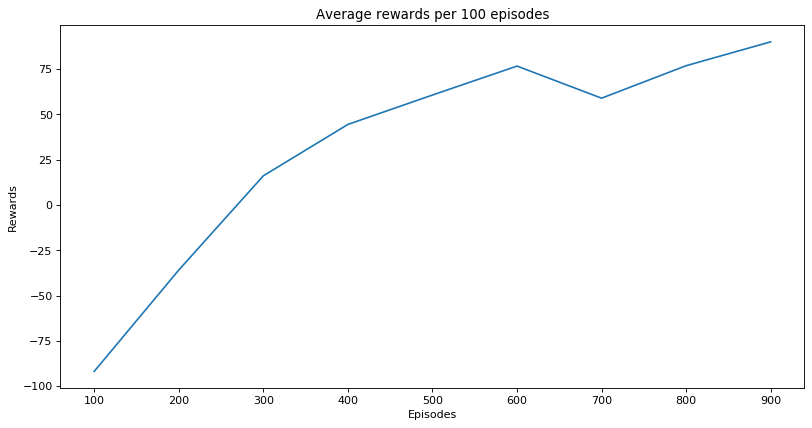

In [11]:
#Plot the average rewards per 100 episodes
plt.figure(figsize=(12,6), dpi=80)
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.title('Average rewards per 100 episodes')
plt.plot(df['Episodes'], df['Avg_Reward'])

# Calculate Average Rewards per 50 Episodes

In [12]:
sum_rewards = 0
avg_rewards_per_50 = []

for i in range (1, len(episodes_rewards_list)+1):
    sum_rewards += episodes_rewards_list[i-1] 
    if (i%50) == 0 :
        avg_rewards_per_50.append(sum_rewards/50)
        sum_rewards=0
    if (i==len(episodes_rewards_list)):
        if (i%50==0):
            break
        else:
            avg_rewards_per_50.append(sum_rewards/(i%50))
        
avg_rewards_per_50

len(avg_rewards_per_50)

17

In [13]:
df_50 = pd.DataFrame()
df_50 = df_50.fillna(0)
df_50['Avg_Reward'] = avg_rewards_per_50
df_50['Episodes'] = (df_50.index+1)*50
df_50

,Avg_Reward,Episodes
0,-94.000000,50
1,-89.620000,100
2,-41.880000,150
3,-29.860000,200
4,6.180000,250
5,26.020000,300
6,34.360000,350
7,54.560000,400
8,50.660000,450
9,70.680000,500


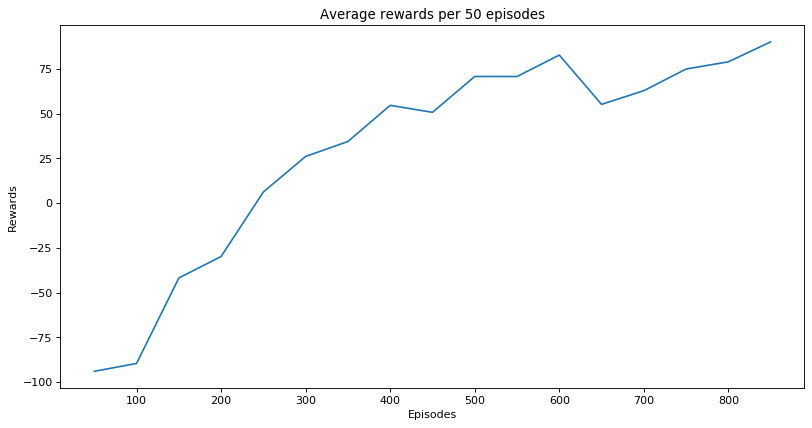

In [14]:
#Plot the average rewards per 50 episodes
plt.figure(figsize=(12,6), dpi=80)
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.title('Average rewards per 50 episodes')
plt.plot(df_50['Episodes'], df_50['Avg_Reward'])

# Calculate Average Rewards per 10 Episodes

In [15]:
sum_rewards = 0
avg_rewards_per_10 = []

for i in range (1, len(episodes_rewards_list)+1):
    sum_rewards += episodes_rewards_list[i-1] 
    if (i%10) == 0 :
        avg_rewards_per_10.append(sum_rewards/10)
        sum_rewards=0
    if (i==len(episodes_rewards_list)):
        if (i%10==0):
            break
        else:
            avg_rewards_per_10.append(sum_rewards/(i%10))
        
avg_rewards_per_10

len(avg_rewards_per_10)

85

In [16]:
df_10 = pd.DataFrame()
df_10 = df_10.fillna(0)
df_10['Avg_Reward'] = avg_rewards_per_10
df_10['Episodes'] = (df_10.index+1)*10


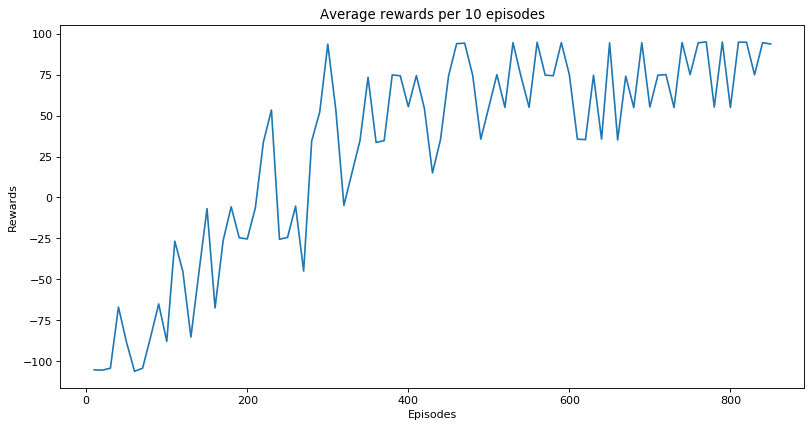

In [17]:
#Plot the average rewards per 10 episodes
plt.figure(figsize=(12,6), dpi=80)
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.title('Average rewards per 10 episodes')
plt.plot(df_10['Episodes'], df_10['Avg_Reward'])

# Calculate Reward per episode

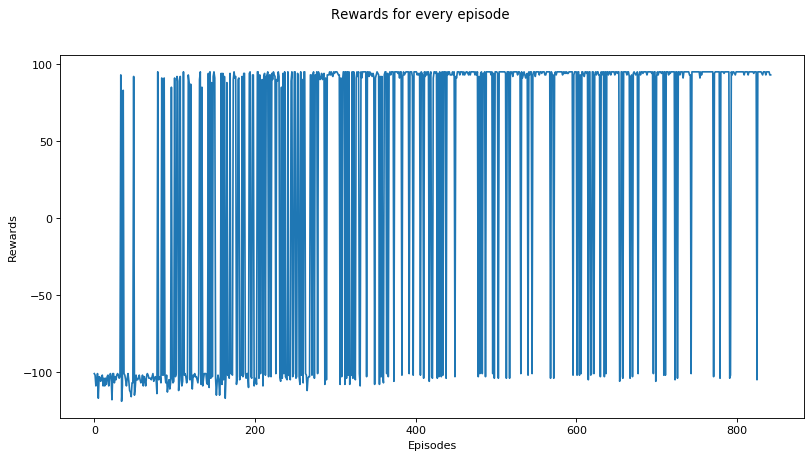

In [18]:
#%% Plot the reward for every episode
reward_per_episode = pd.DataFrame(np.asarray(episodes_rewards_list)) 
reward_per_episode['episodes'] = reward_per_episode.index
reward_per_episode.columns = ['total_reward', 'episodes']


plt.figure(figsize=(12, 6), dpi=80)
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.suptitle('Rewards for every episode')
plt.plot(reward_per_episode['episodes'], reward_per_episode['total_reward'])